In [1]:
import chess
import cv2 as cv
import matplotlib.pyplot as plt

from detectors.chess_position_detector import ChessPositionDetector

In [2]:
image_path = 'data/chess_pieces/test/images/20240302_125048_jpg.rf.ff88169de27cdca17a43905cbce8049a.jpg'
image_path = 'data/chess_pieces/test/images/20240302_125152_jpg.rf.80fb31461755737012017651243ef606.jpg'
image_path = 'data/chess_pieces/test/images/a651794f95_jpeg.rf.257391a8b4091b02255db7b7982ae0a2.jpg'
original_image = cv.imread(image_path, cv.IMREAD_COLOR)

chess_position_detector = ChessPositionDetector()
fen = chess_position_detector.detect(original_image)

print('FEN: {}'.format(fen))

FEN: 1R4r1/3B1n2/2B1q2b/1K6/4N2k/Q4b2/2N5/R3n2r


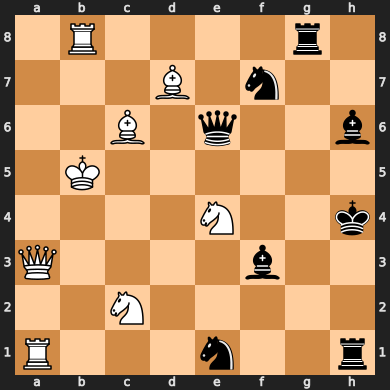

In [3]:
chess.Board(fen)

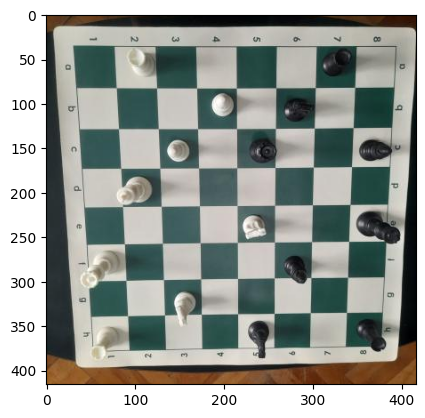

In [4]:
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))